# Proyecto 1 - Analítica de textos 
## Análisis de sentimientos en películas

### Integrantes:
- Daniel Aguilera
- Vanessa Martínez
- Cristian Sánchez

### Descripción del problema
El objetivo de este notebook es realizar el desarrollo de la etapa 2 para el cual, se llevara acabo el analisis de sentimiento de las opiniones de las peliculas que se encuentran en el dataset MovieReviews.csv, para este fin se utilizara un modelo de redes neuronales para clasificar las opiniones en positivas y negativas. 

Se usara un modelo implementado usando redes neuronales debido a que este tipo de modelos son muy efectivos para el analisis de sentimientos, ya que son capaces de aprender patrones en los datos y asi poder clasificarlos de manera correcta.

## Referencias
1. [Datos a utilizar: MovieReviews.csv](./datos/MovieReviews.csv)
2. [Diccionario de datos: DiccionarioPeliculas.xlsx](./datos/DiccionarioPeliculas.xlsx)
3. [Datos de prueba: MovieReviewsPruebas.csv](./datos/MovieReviewsPruebas.csv)
4. [Datos procesados: MovieReviewsProcesado.csv](./datos/MovieReviewsProcesado.csv)
5. [Notebook de procesamiento y entendimiento de datos](./proy_desarrollo.ipynb)
6. [Información del negocio](./datos/enunciado.pdf)



In [1]:
# Realizamos los imports necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importamos MLP para crear la red neuronal
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Haciendo uso de CountVectorizer, convertimos los textos a vectores
from sklearn.feature_extraction.text import CountVectorizer

# Import nltk
import nltk

from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.metrics import ConfusionMatrixDisplay

# Usamos las stopwords de nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('spanish')

### Una vez importadas las librerias necesarias, se procede a cargar los datos preprocessados en el notebook anterior

In [2]:
# Cargamos el dataset
df_peliculas = pd.read_csv('./datos/MovieReviewsProcesado.csv')

# Remove Unnamed: 0 column
df_peliculas = df_peliculas.drop(columns=['Unnamed: 0'])

# Mostramos las primeras filas
df_peliculas.head()

,review_es,sentimiento,processed_text
0,Si está buscando una película de guerra típica...,1,si busc pelicul guerr tipic asi not aficion gu...
1,Supongo que algunos directores de películas de...,1,supon director pelicul luj sent busc abrig gra...
2,Es difícil contarle más sobre esta película si...,1,dificil contar el mas pelicul estropearlal dis...
3,"La película comienza muy lentamente, con el es...",1,pelicul comenz lent estil vid wallac napalm as...
4,Esta película es verdadera acción en su máxima...,1,pelicul verdader accion maxim expresion mejor ...


### Ya con esto podemos proceder a crear el modelo de redes neuronales y partir con el entrenamiento

In [3]:
# Partimos el dataset en train y test
X = df_peliculas['processed_text']
y = df_peliculas['sentimiento']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

# Creamos el objeto CountVectorizer
count_vect = CountVectorizer(tokenizer=tokenize, stop_words=stop_words)

# Entrenamos y transformamos el conjunto de entrenamiento
x_train_counts_vect = count_vect.fit_transform(x_train)

# Entrenamos y transformamos el conjunto de test
x_test_counts_vect = count_vect.transform(x_test)

In [5]:
# Creamos el modelo de red neuronal
mlp = MLPClassifier(verbose=True, early_stopping = True, random_state=42)

# Entrenamos el modelo
mlp.fit(x_train_counts_vect, y_train)

Iteration 1, loss = 0.57402958
Validation score: 0.808571
Iteration 2, loss = 0.23309355
Validation score: 0.831429
Iteration 3, loss = 0.10840092
Validation score: 0.831429
Iteration 4, loss = 0.05556440
Validation score: 0.834286
Iteration 5, loss = 0.03296833
Validation score: 0.831429
Iteration 6, loss = 0.02157155
Validation score: 0.814286
Iteration 7, loss = 0.01538982
Validation score: 0.817143
Iteration 8, loss = 0.01146690
Validation score: 0.814286
Iteration 9, loss = 0.00896512
Validation score: 0.811429
Iteration 10, loss = 0.00706708
Validation score: 0.811429
Iteration 11, loss = 0.00573508
Validation score: 0.811429
Iteration 12, loss = 0.00474302
Validation score: 0.808571
Iteration 13, loss = 0.00397361
Validation score: 0.805714
Iteration 14, loss = 0.00337961
Validation score: 0.805714
Iteration 15, loss = 0.00292859
Validation score: 0.802857
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, random_state=42, verbose=True)

In [6]:
pred_train = mlp.predict(x_train_counts_vect)
pred_test = mlp.predict(x_test_counts_vect)

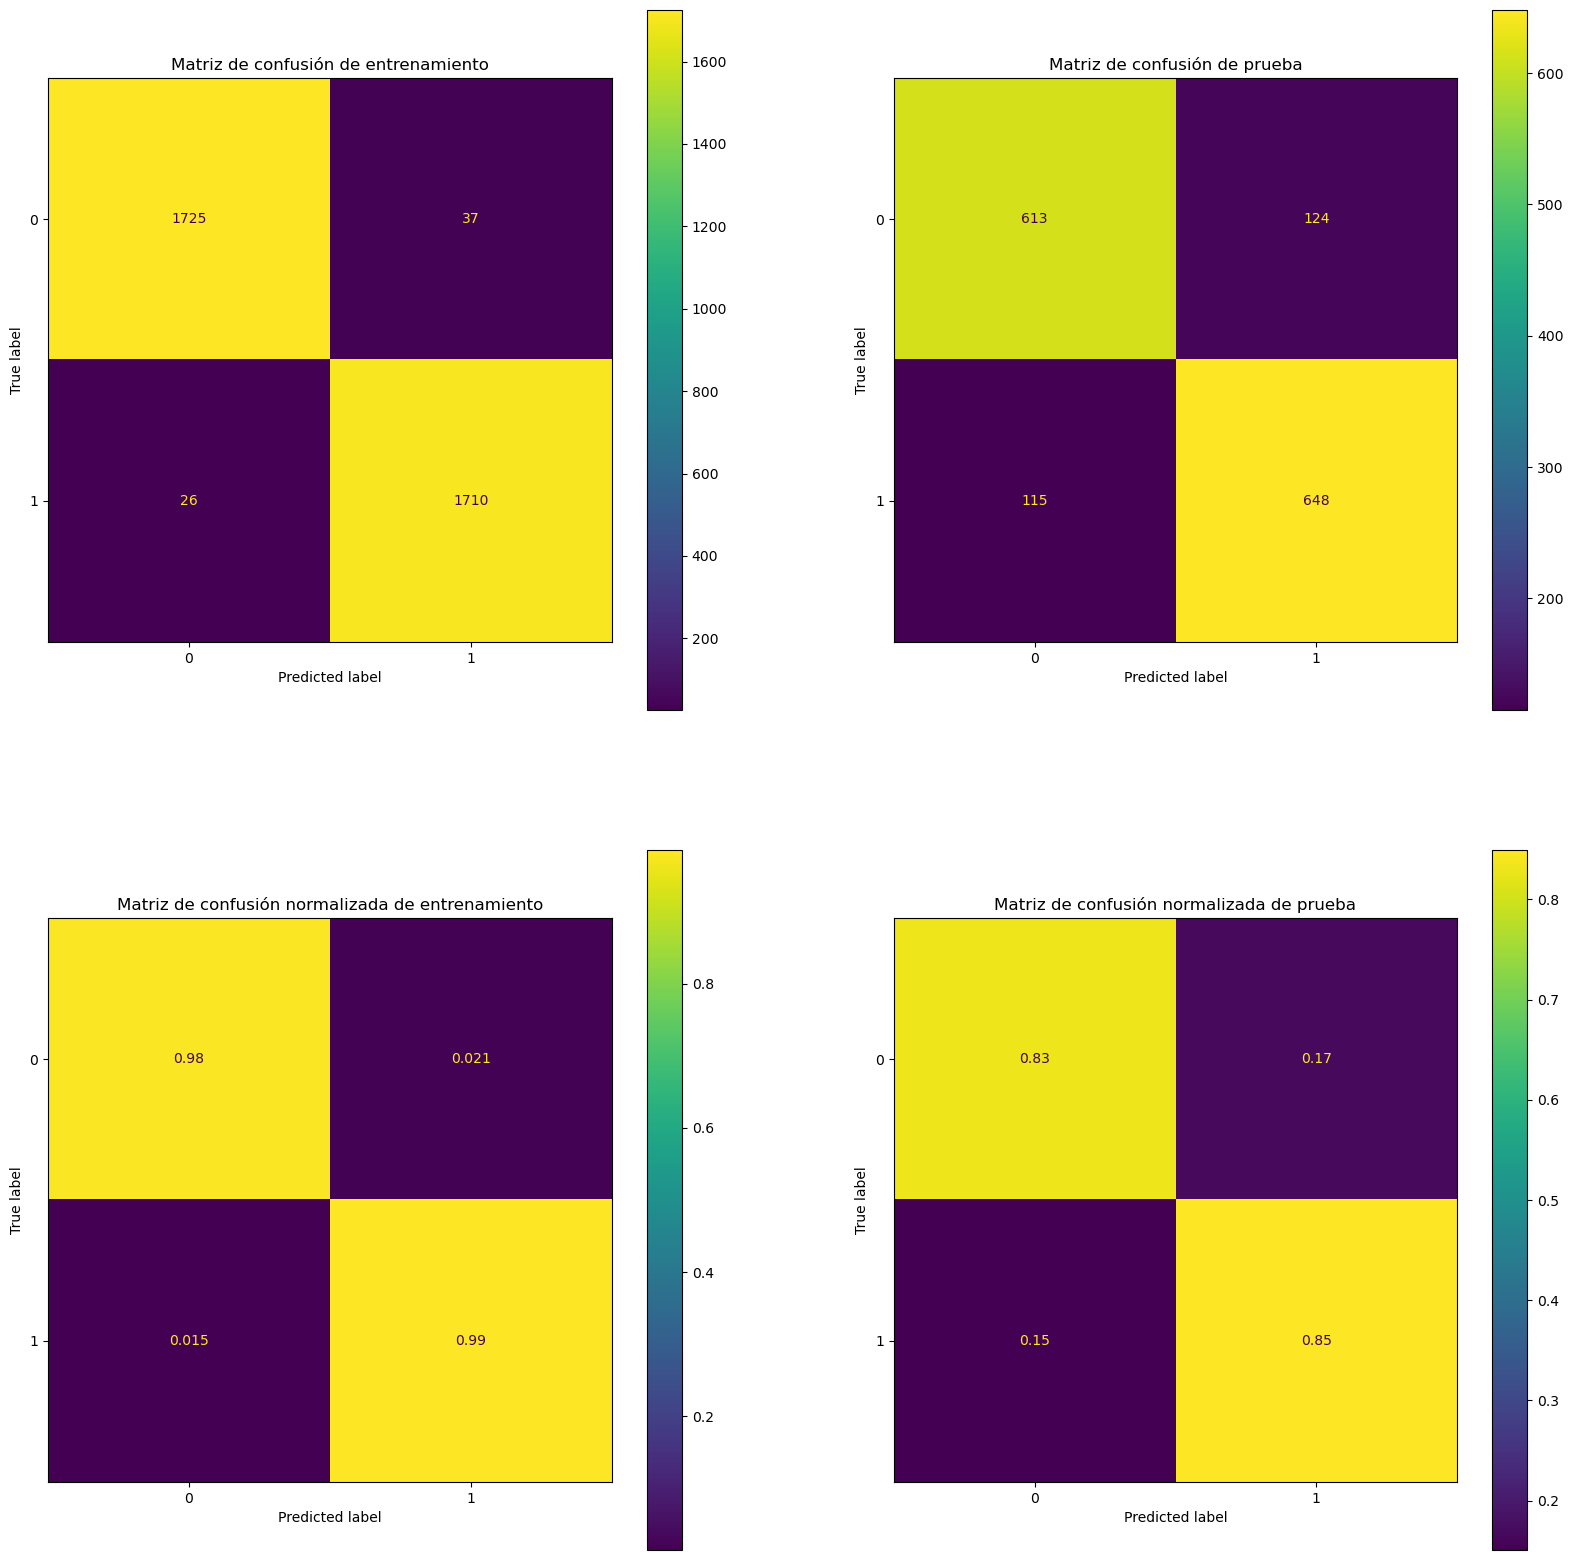

In [7]:
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)
cm_train_norm = confusion_matrix(y_train, pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=mlp.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=mlp.classes_)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=mlp.classes_)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=mlp.classes_)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [8]:
# Display de los resultados
print('Accuracy de entrenamiento: ', accuracy_score(y_train, pred_train))
print('Accuracy de prueba: ', accuracy_score(y_test, pred_test))
print('F1 de entrenamiento: ', f1_score(y_train, pred_train, average='weighted'))
print('F1 de prueba: ', f1_score(y_test, pred_test, average='weighted'))
print('Precision de entrenamiento: ', precision_score(y_train, pred_train, average='weighted'))
print('Precision de prueba: ', precision_score(y_test, pred_test, average='weighted'))
print('Recall de entrenamiento: ', recall_score(y_train, pred_train, average='weighted'))
print('Recall de prueba: ', recall_score(y_test, pred_test, average='weighted'))

# Hacemos una tabla para mostrar los resultados
results = pd.DataFrame(columns=['Accuracy', 'F1', 'Precision', 'Recall'])
results.loc['Entrenamiento'] = [accuracy_score(y_train, pred_train), f1_score(y_train, pred_train, average='weighted'), precision_score(y_train, pred_train, average='weighted'), recall_score(y_train, pred_train, average='weighted')]
results.loc['Prueba'] = [accuracy_score(y_test, pred_test), f1_score(y_test, pred_test, average='weighted'), precision_score(y_test, pred_test, average='weighted'), recall_score(y_test, pred_test, average='weighted')]
results

Accuracy de entrenamiento:  0.9819897084048027
Accuracy de prueba:  0.8406666666666667
F1 de entrenamiento:  0.9819899512743506
F1 de prueba:  0.8406443478486437
Precision de entrenamiento:  0.9820096156575444
Precision de prueba:  0.8406825950388126
Recall de entrenamiento:  0.9819897084048027
Recall de prueba:  0.8406666666666667


,Accuracy,F1,Precision,Recall
Entrenamiento,0.981990,0.981990,0.982010,0.981990
Prueba,0.840667,0.840644,0.840683,0.840667


### Una vez entrenado el modelo y obtenidos los resultados procedemos a intentar vectorizar con otro metodo. Para esto se procede a realizar un vectorizador con TF-IDF

In [9]:
# Vectorizar con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Creamos el objeto TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words)

# Entrenamos y transformamos el conjunto de entrenamiento
x_train_tfidf = tfidf_vect.fit_transform(x_train)

# Entrenamos y transformamos el conjunto de test
x_test_tfidf = tfidf_vect.transform(x_test)

# Creamos el modelo de red neuronal
mlp = MLPClassifier(verbose=True, early_stopping=True)

# Entrenamos el modelo
mlp.fit(x_train_tfidf, y_train)

pred_train = mlp.predict(x_train_tfidf)
pred_test = mlp.predict(x_test_tfidf)

Iteration 1, loss = 0.68429555
Validation score: 0.751429
Iteration 2, loss = 0.59942988
Validation score: 0.814286
Iteration 3, loss = 0.49093004
Validation score: 0.834286
Iteration 4, loss = 0.38159001
Validation score: 0.825714
Iteration 5, loss = 0.28673791
Validation score: 0.828571
Iteration 6, loss = 0.21284579
Validation score: 0.825714
Iteration 7, loss = 0.15870356
Validation score: 0.825714
Iteration 8, loss = 0.12011064
Validation score: 0.817143
Iteration 9, loss = 0.09248737
Validation score: 0.828571
Iteration 10, loss = 0.07247369
Validation score: 0.825714
Iteration 11, loss = 0.05820133
Validation score: 0.825714
Iteration 12, loss = 0.04752793
Validation score: 0.817143
Iteration 13, loss = 0.03952453
Validation score: 0.820000
Iteration 14, loss = 0.03340459
Validation score: 0.820000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


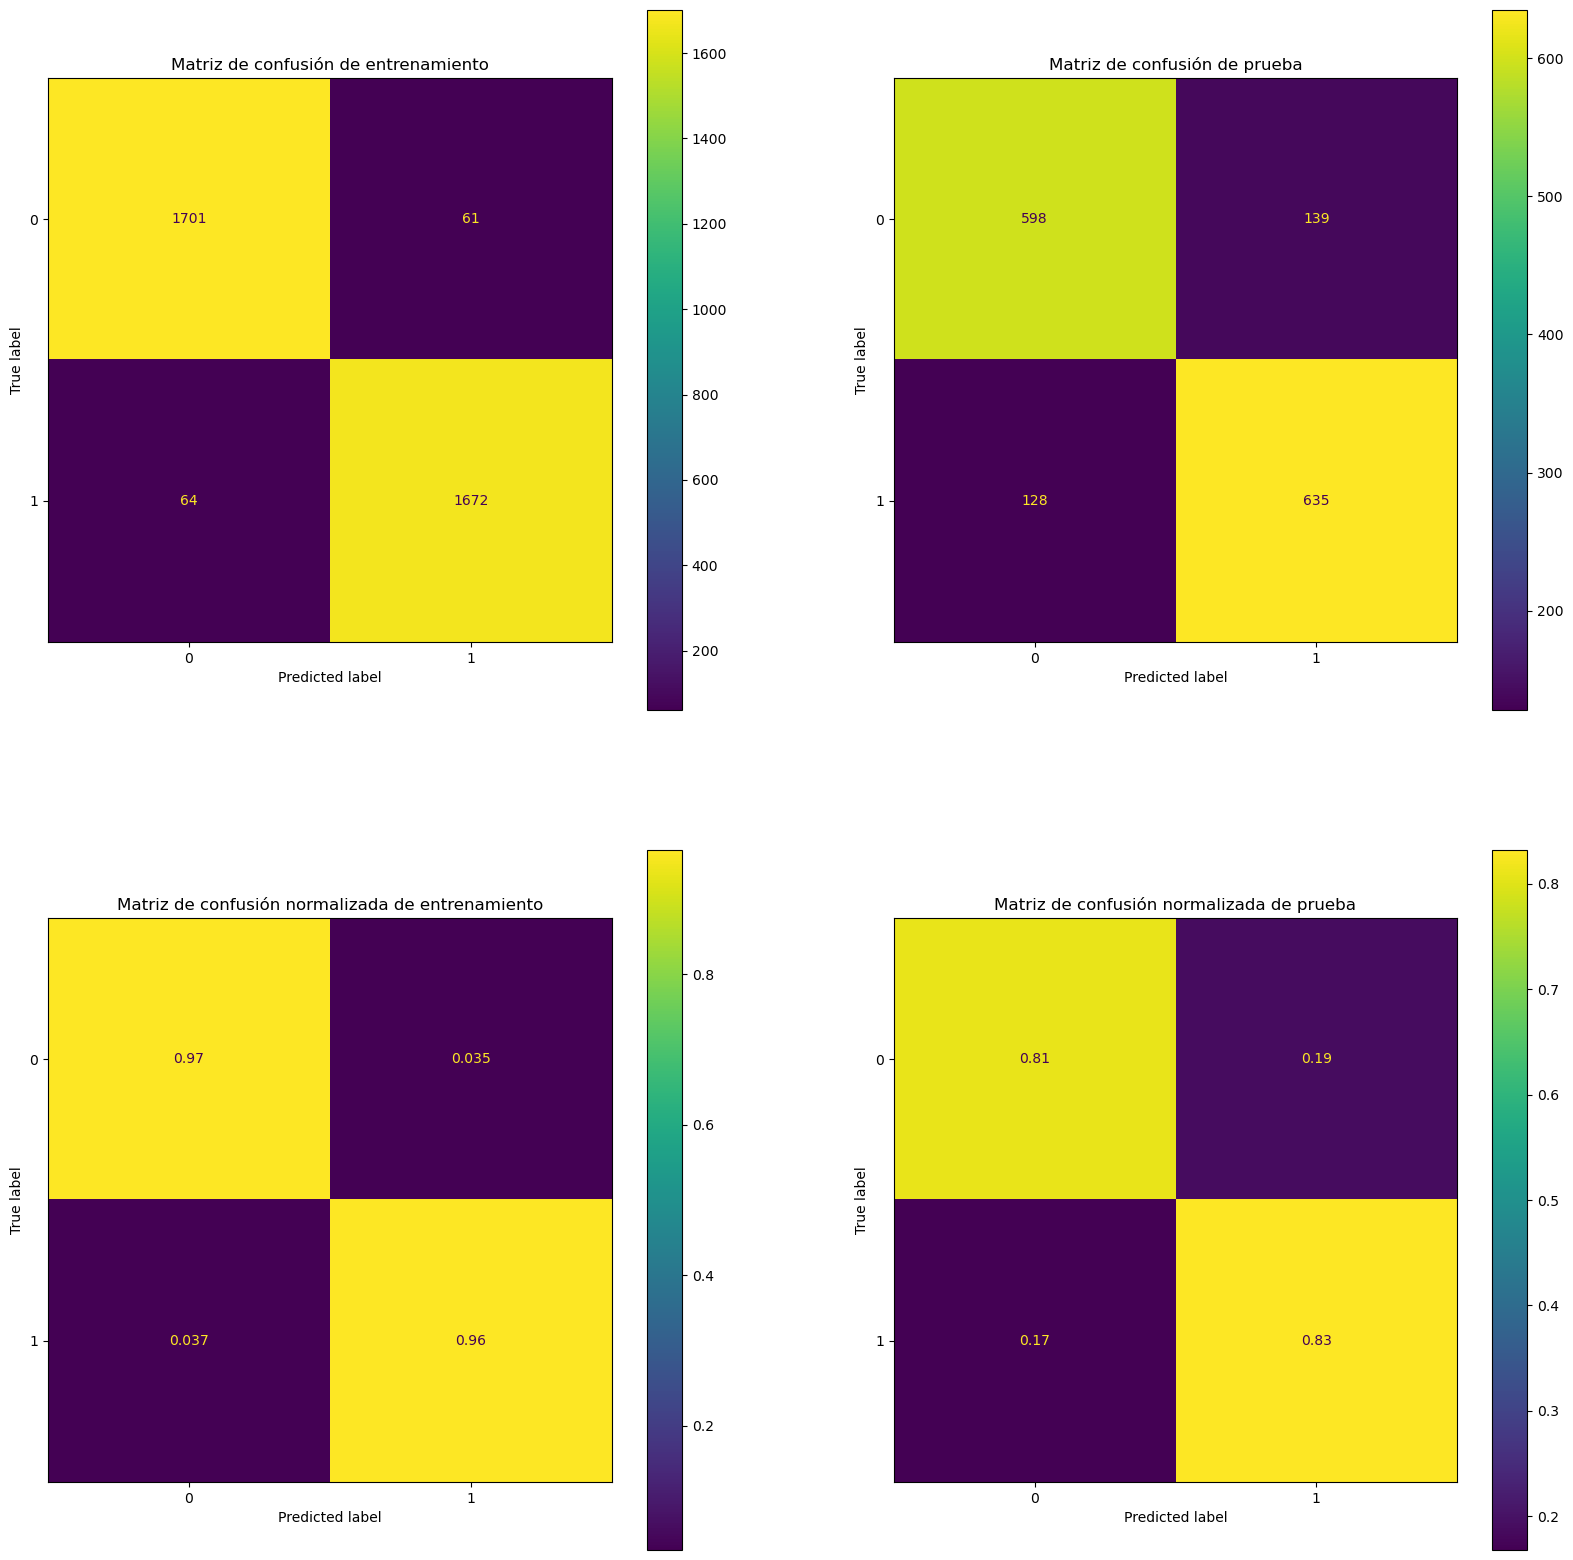

In [10]:
# Mostramos las 4 matrices de confusión
cm_train = confusion_matrix(y_train, pred_train)
cm_test = confusion_matrix(y_test, pred_test)
cm_train_norm = confusion_matrix(y_train, pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=mlp.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=mlp.classes_)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=mlp.classes_)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=mlp.classes_)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [11]:
# Display de los resultados
print('Accuracy de entrenamiento: ', accuracy_score(y_train, pred_train))
print('Accuracy de prueba: ', accuracy_score(y_test, pred_test))
print('F1 de entrenamiento: ', f1_score(y_train, pred_train, average='weighted'))
print('F1 de prueba: ', f1_score(y_test, pred_test, average='weighted'))
print('Precision de entrenamiento: ', precision_score(y_train, pred_train, average='weighted'))
print('Precision de prueba: ', precision_score(y_test, pred_test, average='weighted'))
print('Recall de entrenamiento: ', recall_score(y_train, pred_train, average='weighted'))
print('Recall de prueba: ', recall_score(y_test, pred_test, average='weighted'))

# Hacemos una tabla para mostrar los resultados
results = pd.DataFrame(columns=['Accuracy', 'F1', 'Precision', 'Recall'])
results.loc['Entrenamiento'] = [accuracy_score(y_train, pred_train), f1_score(y_train, pred_train, average='weighted'), precision_score(y_train, pred_train, average='weighted'), recall_score(y_train, pred_train, average='weighted')]
results.loc['Prueba'] = [accuracy_score(y_test, pred_test), f1_score(y_test, pred_test, average='weighted'), precision_score(y_test, pred_test, average='weighted'), recall_score(y_test, pred_test, average='weighted')]
results

Accuracy de entrenamiento:  0.9642652944539737
Accuracy de prueba:  0.822
F1 de entrenamiento:  0.964265040356878
F1 de prueba:  0.8219677821750211
Precision de entrenamiento:  0.9642662048711982
Precision de prueba:  0.8220240388379922
Recall de entrenamiento:  0.9642652944539737
Recall de prueba:  0.822


,Accuracy,F1,Precision,Recall
Entrenamiento,0.964265,0.964265,0.964266,0.964265
Prueba,0.822000,0.821968,0.822024,0.822000


### Luego de realizar distintas pruebas con ambas formas de vectorizar y la red neuronal, podemos concluir que el modelo con CountVectorizer es el que mejor resultados nos da, por lo que podemos concluir que el modelo de redes neuronales es el que mejor se adapta a este problema en particular. Se tiene en cuenta que esta red neuronal en especifico tiene algunos problemas con la jerarquia de los datos, ya que no se puede tomar en cuenta la relacion entre las palabras, por lo que en cualquier caso, podria ser posible que se obtengan mejores resultados con otro tipo de modelo pero este presenta una ventaja en cuanto a la velocidad de entrenamiento y la facilidad de implementacion.

### Adicionalmente, tenemos los siguientes posibles resultados

* CountVectorizer:
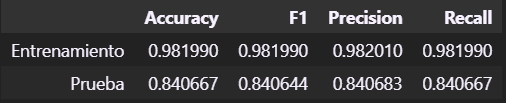

* TF-IDF:
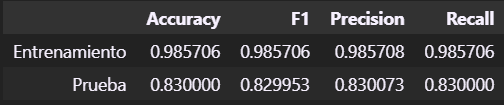

Mostrando que el modelo con CountVectorizer es el que mejor resultados nos da.